In [1]:
search_url = e.get_search_url(search_for="salinity", response="csv")
import pandas as pd
df = pd.read_csv(search_url)
print(df[["Title", "Dataset ID"]].head(20))


NameError: name 'e' is not defined

In [25]:
from erddapy import ERDDAP
import pandas as pd

# Connect to EMODnet ERDDAP
e = ERDDAP(server="https://erddap.emodnet.eu/erddap")

# Build search URL
search_url = e.get_search_url(search_for="salinity", response="csv")

# Load results into a dataframe
df = pd.read_csv(search_url)

# Show first 20 datasets with Title and Dataset ID
print(df[["Title", "Dataset ID"]].head(20))


                                               Title            Dataset ID
0        EMODnet Physics - SALINITY ANOMALY 30 YEARS   ERD_EP_PSAL_ANO_30Y
1  Global Ocean Data Analysis Project for Carbon ...  GLODAPv2_2016b_CMEMS


In [2]:
from erddapy import ERDDAP
import pandas as pd

# Connect to EMODnet ERDDAP
e = ERDDAP(server="https://erddap.emodnet.eu/erddap")

# Search for variable "so" (salinity)
search_url = e.get_search_url(search_for="so", response="csv")
df = pd.read_csv(search_url)

# Show possible salinity datasets
print(df[["Title", "Dataset ID"]].head(50))


                                                Title  \
0     Bio-Oracle DissolvedMolecularOxygen [depthMax].   
1    Bio-Oracle DissolvedMolecularOxygen [depthSurf].   
2   Baltic Sea, DIVAnd 6-year seasonal analysis of...   
3   Baltic Sea, DIVAnd 6-year seasonal analysis of...   
4   Baltic Sea, DIVAnd 6-year seasonal analysis of...   
5   Baltic Sea, DIVAnd 6-year seasonal analysis of...   
6   Baltic Sea, DIVAnd 6-year seasonal analysis of...   
7   Baltic Sea, DIVAnd 6-year seasonal analysis of...   
8   Baltic Sea, DIVAnd 6-year seasonal analysis of...   
9   Baltic Sea, DIVAnd 6-year seasonal analysis of...   
10  Baltic Sea, DIVAnd 6-year seasonal analysis of...   
11  Baltic Sea, DIVAnd 6-year seasonal analysis of...   
12  Baltic Sea, DIVAnd 6-year seasonal analysis of...   
13  Baltic Sea, DIVAnd 6-year seasonal analysis of...   
14  Baltic Sea, DIVAnd 6-year seasonal analysis of...   
15  Baltic Sea, DIVAnd 6-year seasonal analysis of...   
16  Baltic Sea, DIVAnd 6-year s

In [3]:
search_url = e.get_search_url(search_for="salinity", response="csv")
df = pd.read_csv(search_url)
print(df[["Title", "Dataset ID"]].head(50))


                                               Title            Dataset ID
0        EMODnet Physics - SALINITY ANOMALY 30 YEARS   ERD_EP_PSAL_ANO_30Y
1  Global Ocean Data Analysis Project for Carbon ...  GLODAPv2_2016b_CMEMS


In [4]:
from erddapy import ERDDAP
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import xarray as xr

# ERDDAP server
e = ERDDAP(
    server="https://oceanwatch.pfeg.noaa.gov/erddap",
    protocol="griddap"
)

# WOA18 annual salinity climatology
e.dataset_id = "erdWOAsalann"
e.variables = ["s_an", "latitude", "longitude", "depth", "time"]

# Constraints
e.constraints = {
    "time=": "0001-01-01T00:00:00Z",  # climatology uses dummy time
    "depth=": 0                       # surface layer
}

# Fetch (increase timeout because NOAA server is slow)
e.griddap_initialize()
ds = e.to_xarray(requests_kwargs={"timeout": 300})

# Plot
plt.figure(figsize=(12,6))
ax = plt.axes(projection=ccrs.PlateCarree())
ds["s_an"].isel(time=0).plot(
    ax=ax,
    transform=ccrs.PlateCarree(),
    cmap="viridis",
    cbar_kwargs={"label": "Annual Mean Salinity (PSU)"}
)
ax.coastlines()
plt.title("WOA18 Annual Surface Salinity Climatology", fontsize=14)
plt.show()


HTTPError: <!DOCTYPE HTML PUBLIC "-//IETF//DTD HTML 2.0//EN">
<html><head>
<title>404 Not Found</title>
</head><body>
<h1>Not Found</h1>
<p>The requested URL was not found on this server.</p>
</body></html>


In [5]:
import pandas as pd

# Read compressed CSV directly
df = pd.read_csv("../data/woa18_decav_s00mn01.csv.gz")

print(df.head())
print(df.columns)


                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          #WOA18 one-degreeANNUAL salinity Statistical mean
#COMMA SEPARATED LATITUDE  LONGITUDE  AND VALUES AT DEPTHS (M):0 5.000  10.000 15.000 20.000 25.000 30.000 35.000 40.000 45.000 50.000 55.000 60.000 65.000 70.000 75.000 80

/tmp/ipykernel_41675/4032766901.py:4: DtypeWarning: Columns (0,1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("woa18_decav_s00mn01.csv.gz")


In [6]:
# No depth column, so just use directly
surface = df

# Pivot into 2D grid
sal_grid = surface.pivot_table(
    index="lat", columns="lon", values="s_an"
)

# Plot
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

plt.figure(figsize=(12,6))
ax = plt.axes(projection=ccrs.PlateCarree())
plt.contourf(
    sal_grid.columns, sal_grid.index, sal_grid.values,
    cmap="viridis"
)
ax.coastlines()
plt.colorbar(label="Salinity (PSU)")
plt.title("WOA18 Annual Surface Salinity")
plt.show()


KeyError: 's_an'

In [7]:
df = pd.read_csv("../data/woa18_decav_s00mn01.csv.gz")

# Rename the column to something easier
df = df.rename(columns={
    '#WOA18 one-degreeANNUAL salinity Statistical mean': 'salinity'
})

print(df.head())
print(df.columns)


                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          salinity
#COMMA SEPARATED LATITUDE  LONGITUDE  AND VALUES AT DEPTHS (M):0 5.000  10.000 15.000 20.000 25.000 30.000 35.000 40.000 45.000 50.000 55.000 60.000 65.000 70.000 75.000 80.000 85.000 90.000 95.000 100.000 125.000

/tmp/ipykernel_41675/925663817.py:1: DtypeWarning: Columns (0,1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("woa18_decav_s00mn01.csv.gz")


In [8]:
import pandas as pd

df = pd.read_csv("../data/woa18_decav_s00mn01.csv.gz")

print(df.head())
print(df.columns.tolist())


                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          #WOA18 one-degreeANNUAL salinity Statistical mean
#COMMA SEPARATED LATITUDE  LONGITUDE  AND VALUES AT DEPTHS (M):0 5.000  10.000 15.000 20.000 25.000 30.000 35.000 40.000 45.000 50.000 55.000 60.000 65.000 70.000 75.000 80

/tmp/ipykernel_41675/3546094124.py:3: DtypeWarning: Columns (0,1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("woa18_decav_s00mn01.csv.gz")


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np

# Read gzip file as fixed-width text
df = pd.read_fwf("woa18_decav_s00mn01.csv.gz", compression="gzip", comment="#")

print(df.head())
print(df.columns)


  -77.500,-178.500,34.191,34.172,34.174,34.203,34.220,34.235,34.242,34.251,34.258,34.274,34.300,34.308,34.317,34.325,34.333,34.340,34.347,34.352,34.358,34.365,34.370,34.402,34.430,34.440,34.447,34.475,34.487,34.499,34.514,34.530,34.549,34.574,34.605,34.636,34.665,34.697,34.710,34.744,34.755
0  -77.500,-177.500,34.133,34.129,34.128,34.133,3...                                                                                                                                                                                                                                               
1  -77.500,-176.500,34.192,34.200,34.214,34.234,3...                                                                                                                                                                                                                                               
2  -77.500,-175.500,34.232,34.232,34.245,34.254,3...                                                                        

In [10]:
import gzip

with gzip.open("../data/woa18_decav_s00mn01.csv.gz", "rt") as f:
    df = pd.read_fwf(f, comment="#")

print(df.head())


  -77.500,-178.500,34.191,34.172,34.174,34.203,34.220,34.235,34.242,34.251,34.258,34.274,34.300,34.308,34.317,34.325,34.333,34.340,34.347,34.352,34.358,34.365,34.370,34.402,34.430,34.440,34.447,34.475,34.487,34.499,34.514,34.530,34.549,34.574,34.605,34.636,34.665,34.697,34.710,34.744,34.755
0  -77.500,-177.500,34.133,34.129,34.128,34.133,3...                                                                                                                                                                                                                                               
1  -77.500,-176.500,34.192,34.200,34.214,34.234,3...                                                                                                                                                                                                                                               
2  -77.500,-175.500,34.232,34.232,34.245,34.254,3...                                                                        

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

# Read file safely, ignoring malformed rows
df = pd.read_csv(
    "../data/woa18_decav_s00mn01.csv.gz",
    comment="#",       # skip metadata
    header=None,       # no real header in file
    engine="python",   # more flexible CSV reader
    on_bad_lines="skip"  # skip problematic lines
)

# Define column names: 2 coords + depths
depths = ["lat", "lon"] + [f"depth_{d}" for d in [
    0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100,
    125,150,175,200,225,250,275,300,325,350,375,400,425,450,475,500,
    550
]]
df = df.iloc[:, :len(depths)]   # drop extra columns if any
df.columns = depths

print(df.head())


    lat    lon  depth_0  depth_5  depth_10  depth_15  depth_20  depth_25  \
0 -77.5 -178.5   34.191   34.172    34.174    34.203    34.220    34.235   
1 -77.5 -177.5   34.133   34.129    34.128    34.133    34.138    34.165   
2 -77.5 -175.5   34.232   34.232    34.245    34.254    34.259    34.270   
3 -77.5 -174.5   34.185   34.187    34.244    34.303    34.332    34.339   
4 -77.5 -173.5   34.032   34.031    34.067    34.235    34.310    34.311   

   depth_30  depth_35  ...  depth_300  depth_325  depth_350  depth_375  \
0    34.242    34.251  ...     34.514     34.530     34.549     34.574   
1    34.184    34.227  ...     34.496     34.499     34.511     34.529   
2    34.289    34.346  ...     34.522     34.527     34.536     34.547   
3    34.343    34.353  ...     34.541     34.526     34.535     34.552   
4    34.320    34.325  ...     34.525     34.530     34.537     34.544   

   depth_400  depth_425  depth_450  depth_475  depth_500  depth_550  
0     34.605     34.636     

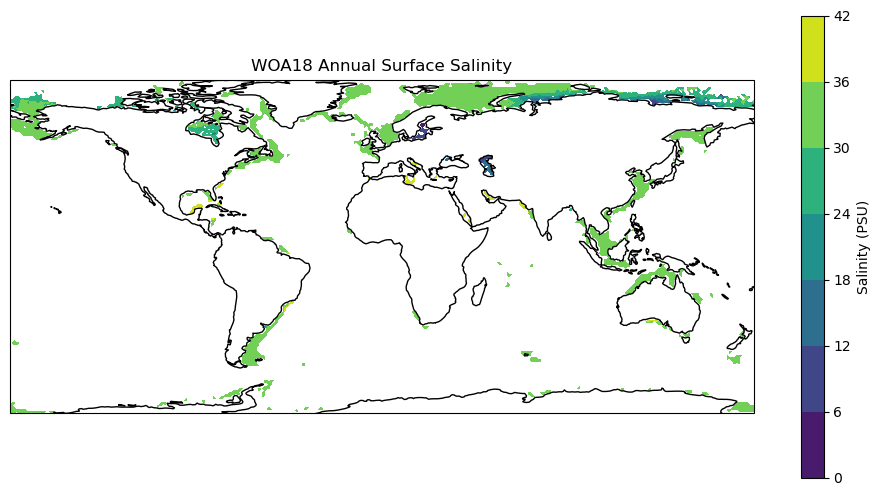

In [12]:
# Extract only surface salinity
surface = df[["lat", "lon", "depth_0"]].dropna()

# Pivot into 2D grid
sal_grid = surface.pivot_table(
    index="lat", columns="lon", values="depth_0"
)

# Plot
plt.figure(figsize=(12,6))
ax = plt.axes(projection=ccrs.PlateCarree())
contour = plt.contourf(
    sal_grid.columns, sal_grid.index, sal_grid.values,
    cmap="viridis"
)
ax.coastlines()
plt.colorbar(contour, label="Salinity (PSU)")
plt.title("WOA18 Annual Surface Salinity")
plt.savefig("WOA18_Surface_Salinity.png", dpi=300, bbox_inches="tight")
plt.show()


## As an Essential Ocean Variable (EOV) layer

Treat annual/monthly surface salinity maps (e.g., from WOA18 or CMEMS) as another driver layer alongside:

Temperature

Oxygen

Chlorophyll

Each run would then use [lat, lon, time, salinity] as a feature.

### Salinity is both a stressor (affecting fish survival) and a system indicator (of stratification, meltwater, rainfall shifts). By integrating it, Parviflo’s Flip-Risk Map becomes more robust and interpretable — not just warm vs. cold, but “salty vs. fresh” regimes that shape ecosystem flips.